# Read the dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
#specify data
data = pd.read_csv('insurance.csv')

In [3]:
#check the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#eplore the data more
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#print the head of the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#check for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#shape of the data
data.shape

(1338, 7)

In [8]:
#create variables for feature (X) and target (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, 6].values

# Visulaize the data

In [9]:
#import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

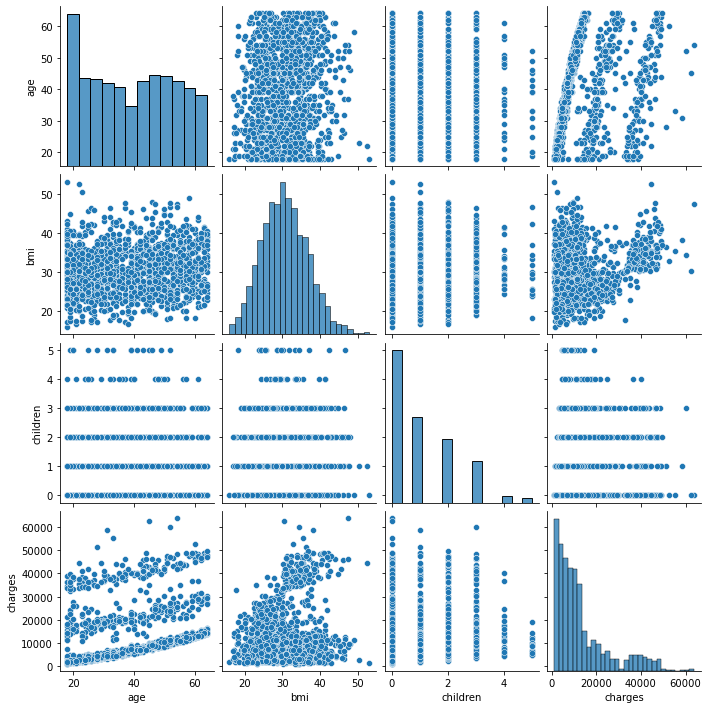

In [10]:
sns.pairplot(data)

<AxesSubplot:xlabel='age'>

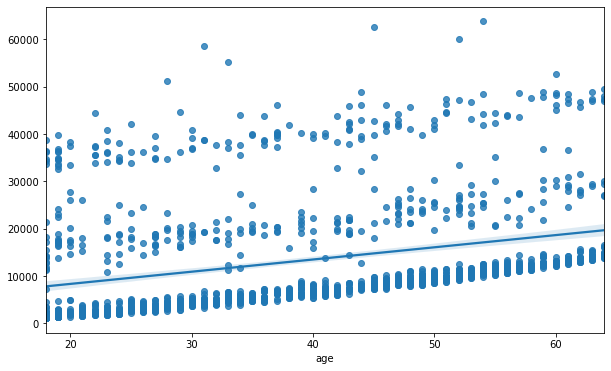

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(x = data['age'], y = y)

<AxesSubplot:xlabel='bmi'>

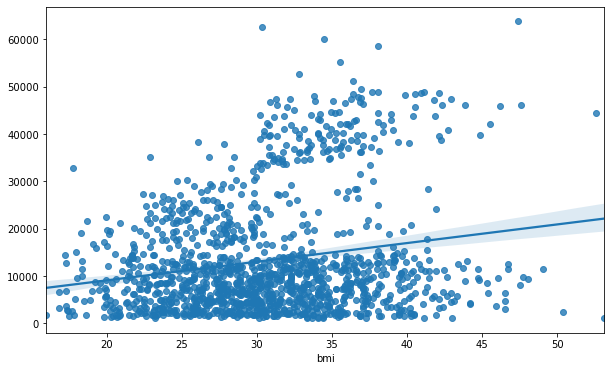

In [12]:
plt.figure(figsize=(10,6))
sns.regplot(x = data['bmi'], y = y)

<AxesSubplot:xlabel='children'>

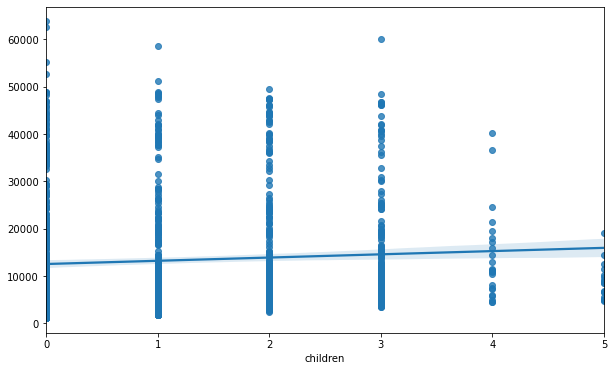

In [13]:
plt.figure(figsize=(10,6))
sns.regplot(x = data['children'], y = y)

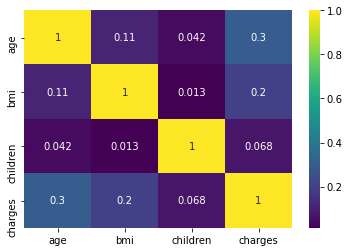

In [14]:
plt.figure()
x = data.drop(['sex','smoker','region'],axis = 1)
ax = sns.heatmap(x.corr(),annot = True,cmap = 'viridis')
plt.show()

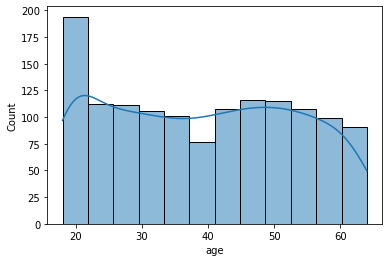

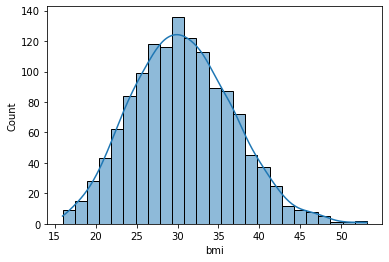

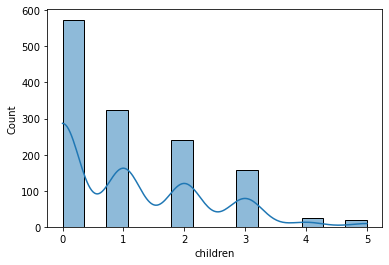

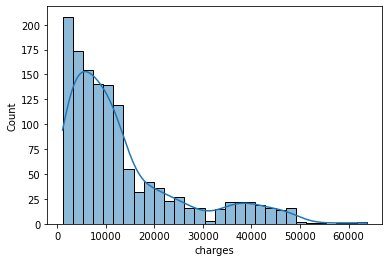

In [15]:
plt.figure()
for i in x.columns:
    sns.histplot(x[i], kde = True)
    plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

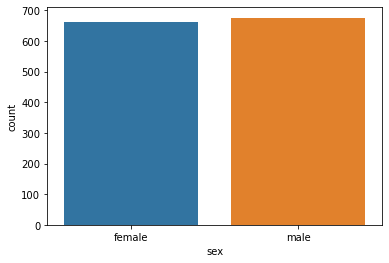

In [16]:
sns.countplot(x = 'sex', data = data)

<AxesSubplot:xlabel='smoker', ylabel='count'>

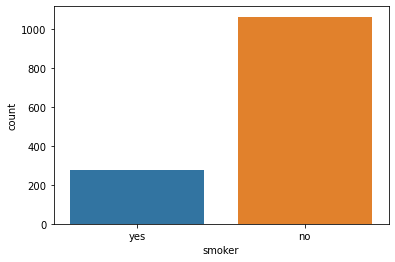

In [17]:
sns.countplot(x = 'smoker', data = data)

<AxesSubplot:xlabel='region', ylabel='count'>

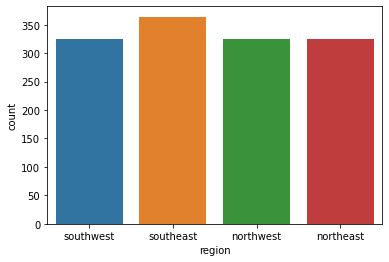

In [18]:
sns.countplot(x = 'region', data = data)

#### the graph shows that polynomial regression model will best fist the data

# Data Preprocessing

In [19]:
#import necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [20]:
n = 'sex'
encoded_method = LabelEncoder.fit_transform(LabelEncoder,data[n])
pd.DataFrame(data[n].value_counts().index, pd.Series(encoded_method).value_counts().index)
data = data.copy()
label_1 = pd.get_dummies(data,columns=[n],drop_first=True)
label_1.insert(loc=2, column=n, value=data[n].values)
label_1.drop([n],axis = 1,inplace = True)
label_1

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1
1334,18,31.920,0,no,northeast,2205.98080,0
1335,18,36.850,0,no,southeast,1629.83350,0
1336,21,25.800,0,no,southwest,2007.94500,0


In [21]:
n = 'smoker'
encoded_method = LabelEncoder.fit_transform(LabelEncoder,data[n])
pd.DataFrame(data[n].value_counts().index, pd.Series(encoded_method).value_counts().index)
label_1 = label_1.copy()
label_2 = pd.get_dummies(label_1,columns=[n],drop_first=True)
label_2.insert(loc=2, column=n, value=data[n].values)
label_2.drop([n],axis = 1,inplace = True)
label_2

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,1,0
1334,18,31.920,0,northeast,2205.98080,0,0
1335,18,36.850,0,southeast,1629.83350,0,0
1336,21,25.800,0,southwest,2007.94500,0,0


In [22]:
n = 'region'
encoded_method = LabelEncoder.fit_transform(LabelEncoder,data[n])
pd.DataFrame(data[n].value_counts().index, pd.Series(encoded_method).value_counts().index)
label_2 = label_2.copy()
label_3 = pd.get_dummies(label_2,columns=[n],drop_first=True)
label_3.insert(loc=2, column=n, value=data[n].values)
label_3.drop([n],axis = 1,inplace = True)
label_3

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


# Feature Scaling

In [23]:
#import necessary libararies
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(label_3.drop(['charges'],axis = 1))

StandardScaler()

# Feature Selection

In [25]:
#we have modified our data, hence our X and y will change
X = label_3.drop(['charges'],axis = 1)
Y = label_3['charges']

# Model

In [26]:
#import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [27]:
#split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [28]:
# Fitting Linear Regression to the dataset
poly=PolynomialFeatures(degree=2)
lm_poly=LinearRegression()

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

lm_poly.fit(X_train_poly,y_train)


LinearRegression()

# Accuracy

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error

In [30]:
y_pred = lm_poly.predict(X_test_poly)
rmse = np.sqrt(mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error is :", rmse)

Root Mean Squared Error is : 53.91710727256972


In [31]:
r2 = r2_score(y_test, y_pred)
print("Accuracy of the model(R2 score) is :", r2)

Accuracy of the model(R2 score) is : 0.8592237696954708
